In [41]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps
%matplotlib inline

In [70]:
sample_size = 100
sample = sps.cauchy.rvs(loc=0, scale=1, size=sample_size)

### В качестве оценки максимального правдоподобия берем $\overline{X}$

In [72]:
max_mark = [sample[: i + 1].mean() for i in range(sample_size)]

### В качестве байесовской оценки берем матожидание случайной величины с сопряженным к нормальному распределению с известной дисперсией, в качестве параметра сдвига и масштаба, исходя из наших знаний о $\theta$, берём $(\sigma_0, \mu_0)=(0, 0.25)$ (исходя из правила трёх сигм)

In [62]:
mu_ = 0
sigma_ = 0.25
sigma_square = sigma_**2

bayesian_mark = [(mu_/sigma_square + sum(sample[: i + 1])/(1/sigma_square + i + 1)) for i in range(sample_size)]

### Нарисуем графики отклонений о истинного значения $\theta = 0$

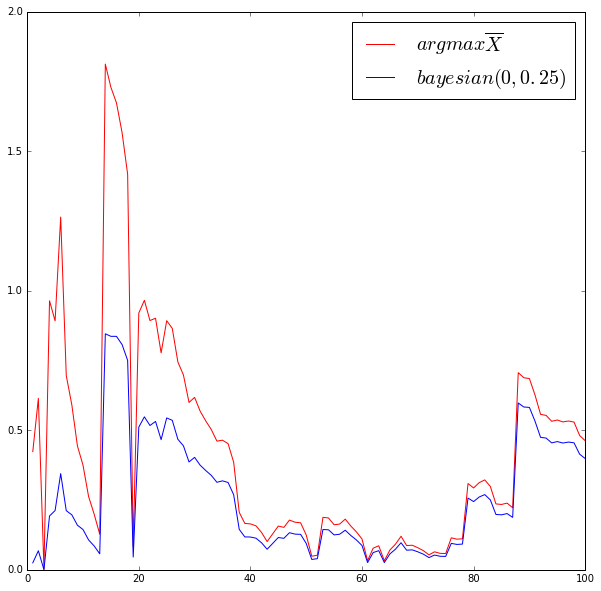

In [63]:
plt.figure(figsize=(10, 10))
plt.plot(np.arange(1, 101), abs(np.array(max_mark)), color='red', label='$argmax \overline{X}$')
plt.plot(np.arange(1, 101), abs(np.array(bayesian_mark)), color='blue', label='$bayesian (0, 0.25)$')
plt.legend(loc=0, fontsize=20)
plt.show()

### Мы видим, что байесовская оценка ведет себя лучше 